In [ ]:
# Módulos, funciones y clases a utilizar

import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import os
import pandas as pd

from google.colab import drive
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from warnings import filters

In [ ]:
#Importo el conjunto de datos RVL-CDIP

#drive.mount('/content/drive')

In [ ]:
#ls

In [ ]:
# Ruta al archivo ZIP
#zip_path = '/content/drive/MyDrive/RVL-CDIP.zip'

# Creo una instancia de ZipFile y extraigo todo el contenido en la carpeta "/data"
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall('/data')

In [ ]:
!pip install --upgrade --no-cache-dir gdown

!gdown --id 1NWcFJai-KMYuCf2YqEFuQji6hKdjmMjZ

!unzip -q RVL-CDIP.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1NWcFJai-KMYuCf2YqEFuQji6hKdjmMjZ
From (redirected): https://drive.google.com/uc?id=1NWcFJai-KMYuCf2YqEFuQji6hKdjmMjZ&confirm=t&uuid=b2e6b9a6-bf53-429f-9197-e42419b76b1e
To: /content/RVL-CDIP.zip
100% 755M/755M [00:10<00:00, 70.5MB/s]


In [ ]:
# Defino 3 variables que contienen rutas (paths)a directorios donde se encuentran los datos de entrenamiento y prueba.
# Se estará utilizando os.path.join() para unir la ruta base con la rutas de entrenamiento y prueba

base_dir = '/content/RVL-CDIP' #Ruta al directorio base donde se encuentran los datos
train_path = os.path.join(base_dir, '/data/RVL-CDIP/train') #Ruta de entrenamiento
test_path = os.path.join(base_dir, '/data/RVL-CDIP/test') #Ruta de prueba

**Arquitectura de la red neuronal convolucional y compilación del modelo 1**

In [ ]:
#Genero lotes de datos de entrenamiento y prueba mediante Data Augmentation y codificación one-hot

batch_size = 128 # Número de ejemplos de entrenamiento que se procesan a la vez en una sola iteración del algoritmo

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255, #Rescalación de las imágenes de entrenamiento en valores de 0 a 1
)

train_it = train_datagen.flow_from_directory(
        'RVL-CDIP/train/',
        batch_size = 32,
        target_size=(224,224), #Tamaño de imagen
        class_mode='categorical', #Codificación one-hot de las etiquetas de clase
        subset='training') #Señalo que solo quiero utilizar el conjunto de entrenamiento

test_it= train_datagen.flow_from_directory(
        'RVL-CDIP/test/',
        batch_size = 32,
        target_size=(224,224),
        class_mode='categorical')

Found 3003 images belonging to 2 classes.
Found 3003 images belonging to 2 classes.


In [ ]:
# Utilizo el optimizador Adam, la función pérdida 'categorical_crossentropy', y metrica de precisión (accuracy).
# La red tiene 3 capas de convolución y max-pooling (para evitar info redundante de las imagenes de entrada y evitar sobreajuste),
# seguidas de 1 capa densa con activación 'relu' (Rectified Linear Unit) y una capa de salida con activación 'softmax'.

num_classes = 2

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)), #capa de convolucion
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), #capa de convolucion
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'), #capa de convolucion
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  # capa de achatado
    layers.Dense(128, activation='relu'), #capa densa
    layers.Dense(num_classes, activation='softmax') # capa de salida
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
history = model.fit(train_it, epochs = 5, validation_data = test_it)

Epoch 1/5
94/94 [==============================] - 525s 6s/step - loss: 0.5992 - accuracy: 0.7882 - val_loss: 0.3572 - val_accuracy: 0.8821
Epoch 2/5
94/94 [==============================] - 502s 5s/step - loss: 0.1524 - accuracy: 0.9427 - val_loss: 0.4558 - val_accuracy: 0.8302
Epoch 3/5
94/94 [==============================] - 489s 5s/step - loss: 0.0741 - accuracy: 0.9734 - val_loss: 0.5255 - val_accuracy: 0.8198
Epoch 4/5
94/94 [==============================] - 501s 5s/step - loss: 0.0522 - accuracy: 0.9804 - val_loss: 0.3132 - val_accuracy: 0.8631
Epoch 5/5
94/94 [==============================] - 459s 5s/step - loss: 0.0510 - accuracy: 0.9814 - val_loss: 0.2306 - val_accuracy: 0.9214


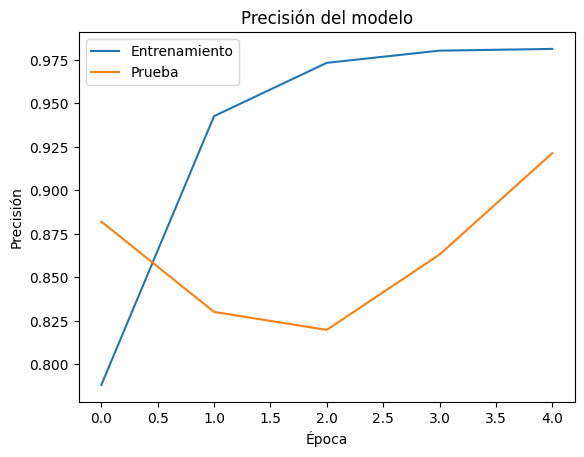

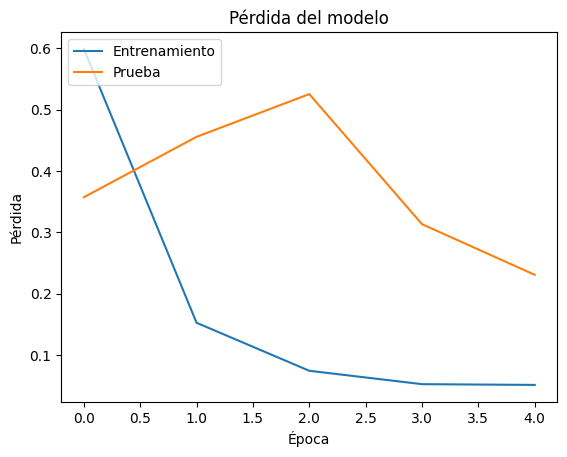

In [ ]:
# Visualizo la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

# Visualizo la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

In [ ]:
# Convierto el historial de entrenamiento en un DataFrame de Pandas
df_history = pd.DataFrame(history.history)

# Muestro la tabla con las métricas de entrenamiento
print(df_history)

       loss  accuracy  val_loss  val_accuracy
0  0.599170  0.788212  0.357154      0.882118
1  0.152402  0.942724  0.455778      0.830170
2  0.074075  0.973360  0.525486      0.819847
3  0.052228  0.980353  0.313249      0.863137
4  0.050993  0.981352  0.230632      0.921412


**Arquitectura de la red neuronal convolucional y compilación del modelo 2**

In [ ]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)


train_it = test_datagen.flow_from_directory(
    'RVL-CDIP/train/',
    batch_size=64,
    target_size=(256,256), # Tamaño de imagen
    class_mode='categorical', # Codificación one-hot de las etiquetas de clase
    subset='training' # Señalo que solo quiero utilizar el conjunto de entrenamiento
)


test_it = test_datagen.flow_from_directory(
    'RVL-CDIP/test/',
    batch_size=64,
    target_size=(256,256), # Tamaño de imagen
    class_mode='categorical'
)

Found 3003 images belonging to 2 classes.
Found 3003 images belonging to 2 classes.


In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(256,256,3)), # capa de entrada
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"), # capa de convolución
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"), # capa de convolución
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"), # capa de convolución
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(), # capa de aplanamiento
    keras.layers.Dense(units=512, activation="relu"), # capa densa
    keras.layers.Dense(units=2, activation="softmax") # capa de salida con dos clases
])

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)       

In [ ]:
model_fit = model.fit(train_it, epochs=5, validation_data=test_it)

In [ ]:
# Visualizo la precisión
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Visualizo la pérdida
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
# Convierto el historial de entrenamiento en un DataFrame de Pandas
df_history2 = pd.DataFrame(model_fit.history)

# Muestro la tabla con las métricas de entrenamiento
print(df_history2)

**Arquitectura RestNet50**

Arquitectura pre-entrenada en ImageNet

In [ ]:
def ResNet(classes):
  from keras.applications.resnet_v2 import ResNet50V2
  base_model = ResNet50V2(input_shape = (224,224,3), weights='imagenet', include_top=False) #Elimino la capa de clasificación de la red neuronal pre-entrenada
  base_model.trainable = False

  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(name='GlobalAvgPooling_Layer'), #Reduzco la dimensión de los datos con GlobalAveragePooling2D
    tf.keras.layers.Dropout(0.4, name='Dropout_Layer'), #Reduzco el sobreajuste
    tf.keras.layers.Dense(classes, activation='softmax', name='Output_Layer')
  ])

  model.summary()


model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001, momentum=0.9), metrics = ['accuracy'])
return model


In [ ]:
def ResNet(classes):
  from keras.applications.resnet_v2 import ResNet50V2
  base_model = ResNet50V2(input_shape = (224,224,3), weights='imagenet', include_top=False) #Elimino la capa de clasificación de la red neuronal pre-entrenada
  base_model.trainable = False
  model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(name='GlobalAvgPooling_Layer'), #Reduzco la dimensión de los datos con GlobalAveragePooling2D
    tf.keras.layers.Dropout(0.4, name='Dropout_Layer'), #Reduzco el sobreajuste
    tf.keras.layers.Dense(classes, activation='softmax', name='Output_Layer')
  ])

  model.summary()

  model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001, momentum=0.9), metrics = ['accuracy']) #Utilizo misma función de pérdida 'categorical_crossentropy' y metrica de precisión que en la arquitectura anterior
  return model

In [ ]:
resnet_model = ResNet(classes = 2)

In [ ]:
resnet_history = resnet_model.fit(train_it, epochs=5, validation_data = test_it, verbose = 1)

In [ ]:
# Visualizo la precisión
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Visualizo la pérdida
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [ ]:
# Convierto el historial de entrenamiento en un DataFrame de Pandas
df_resnethistory = pd.DataFrame(resnet_history.history)

# Muestro la tabla con las métricas de entrenamiento
print(df_resnethistory)



**Conclusión**

**Modelo 1.** El modelo tiene una buena precisión y un bajo valor de pérdida en el conjunto de entrenamiento, lo que indica que el modelo ha aprendido bien los patrones en los datos de entrenamiento. Sin embargo, la precisión en el conjunto de validación es menor que en el conjunto de entrenamiento y la función de pérdida es mayor, lo que sugiere que el modelo puede estar sobreajustando los datos de entrenamiento y no generalizando bien a datos nuevos.

**Modelo 2.** El modelo 2 obtuvo resultados similares al modelo 1. Se considera que asimismo requiere ajustes adicionales, como por ejemplo, ajustar la tasa de aprendizaje (learning rate) o cambiar la arquitectura de la red, para lograr un rendimiento óptimo en la tarea de clasificación.

**Modelo Resnet.** El modelo está teniendo dificultades para hacer predicciones precisas, ya que la exactitud (accuracy) es relativamente baja en todas las épocas. Además, tanto la pérdida de entrenamiento (loss) como la pérdida de validación (val_loss) parecen estar aumentando con el tiempo, lo que también puede ser una señal de que el modelo está sobreajustando los datos de entrenamiento. Posiblemente el modelo podría mejorar con un ajuste adicional para mejorar su rendimiento.
